In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc

In [2]:
wine=pd.read_csv('wine.csv')
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.shape

(178, 15)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
class_label             178 non-null int64
class_name              178 non-null object
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 20.9+ KB


In [5]:
wine.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Preprocessing
#### Missing values detection

In [6]:
wine.isnull().any()

class_label             False
class_name              False
alcohol                 False
malic_acid              False
ash                     False
alcalinity_of_ash       False
magnesium               False
total_phenols           False
flavanoids              False
nonflavanoid_phenols    False
proanthocyanins         False
color_intensity         False
hue                     False
od280                   False
proline                 False
dtype: bool

#### There are no missing values detected in this dataset.

#### Outlier Detection and Standerdization

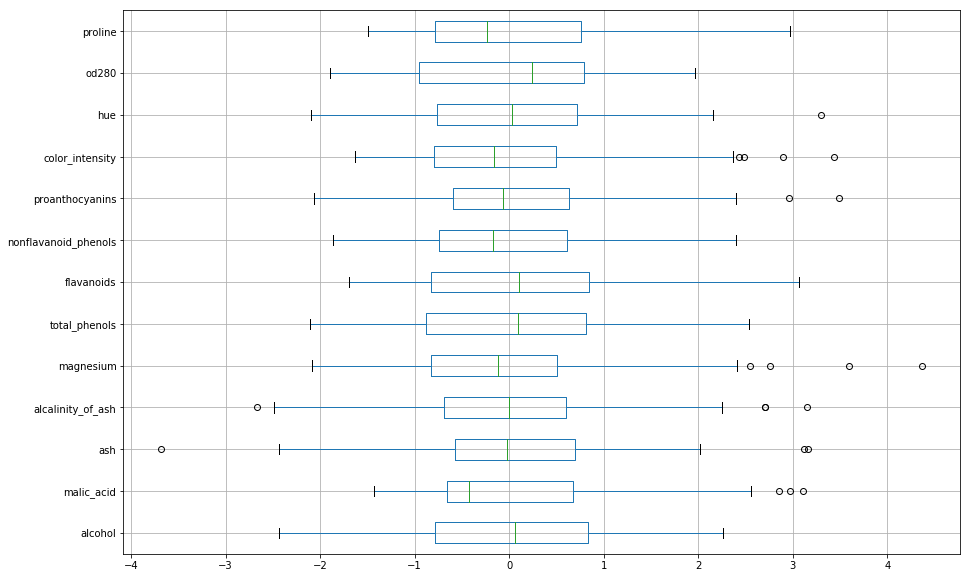

In [7]:
from sklearn.preprocessing import StandardScaler
x=wine.drop(['class_name','class_label'], axis=1)
scaler=StandardScaler().fit(x)
y=pd.DataFrame(scaler.transform(x),columns=x.columns)
y.boxplot(vert=False,figsize=(15,10))

#### From the above boxplot we infer that the variables hue,color_intensity, proanthocyanins, magnesium, alcalinity_of_ash, ash, malic_acid have outliers.

#### Applying PCA on the wine dataset

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(y)
principalDf = pd.DataFrame(data = principalComponents, columns=['component1','component2','component3','component4','component5','component6','component7','component8','component9',
        'component10','component11','component12','component13'])

In [10]:
finalDf = pd.concat([principalDf, wine[['class_name']]], axis = 1)

In [11]:
finalDf.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,class_name
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,Barolo
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,Barolo
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,Barolo
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,Barolo
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,Barolo


In [12]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

#### Cummulative proportion  of all 13 features

In [13]:
CP=np.cumsum(pca.explained_variance_ratio_)
CP

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

#### Plotting Cummulative Proportion of all 13 features

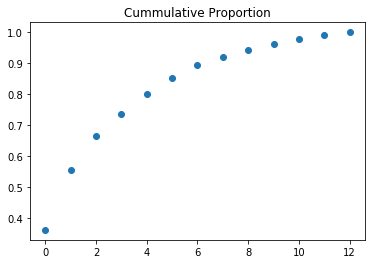

In [29]:
plt.plot(CP, 'o')
plt.title("Cummulative Proportion")
plt.show()

#### From the above plot we infer that 90% can be achived when components=8

### Model building where components_n=8 with PCA

In [15]:
pca1 = PCA(n_components=8)
principalComponents = pca1.fit_transform(y)
principalDf1 = pd.DataFrame(data = principalComponents, columns=['component1','component2','component3','component4','component5','component6','component7','component8'])

In [16]:
finalDf1 = pd.concat([principalDf1, wine[['class_name']]], axis = 1)

In [17]:
finalDf1.head()

,component1,component2,component3,component4,component5,component6,component7,component8,class_name
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,Barolo
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,Barolo
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,Barolo
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,Barolo
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,Barolo


### Using Logistic Regression

In [18]:
X=principalDf1
Y=wine['class_name']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.shape, Y_train.shape

((142, 8), (142,))

In [20]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_predict = LR.predict(X_test)
y_accuracy = metrics.accuracy_score(Y_test,y_predict)
print(y_accuracy)

0.9722222222222222


### Model building without PCA using Logistic Regression

In [21]:
A=y
B=wine['class_name']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=1)
x_train.shape, y_train.shape

((142, 13), (142,))

In [23]:
LR1 = LogisticRegression()
LR1.fit(x_train, y_train)
y1_predict = LR1.predict(x_test)
y1_accuracy = metrics.accuracy_score(y_test,y1_predict)
print(y1_accuracy)

1.0


### Model building where components_n=5 with PCA

In [24]:
pca2 = PCA(n_components=5)
principalComponents = pca2.fit_transform(y)
principalDf2 = pd.DataFrame(data = principalComponents, columns=['component1','component2','component3','component4','component5'])

In [25]:
finalDf2 = pd.concat([principalDf2, wine[['class_name']]], axis = 1)
finalDf2.head()

,component1,component2,component3,component4,component5,class_name
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,Barolo
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,Barolo
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,Barolo
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,Barolo
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,Barolo


### Using Logistic Regression

In [26]:
a=principalDf2
b=wine['class_name']

In [27]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(a, b, test_size=0.2, random_state=1)
X1_train.shape, Y1_train.shape

((142, 5), (142,))

In [28]:
LR2 = LogisticRegression()
LR2.fit(X1_train, Y1_train)
y2_predict = LR2.predict(X1_test)
y2_accuracy = metrics.accuracy_score(Y1_test,y2_predict)
print(y2_accuracy)

1.0
